In [6]:
import numpy as np
import sympy as sp
import pandas as pd
import matplotlib.pyplot as plt
from fractions import Fraction as Frac

n_single = 225
n_double = 60
n_fraction = 225

In [14]:
def x_k(i, x_k_values):
    if (i == 0):
        return x_k_values[0]
    elif (i == 1):
        return x_k_values[1]
    else:
        return 2.25*x_k_values[i-1]-0.5*x_k_values[i-2]


def generate_n_elements(n, precision, root_values):
    x_k_values = np.zeros(n, dtype=precision)
    x_k_values[0] = root_values[0]
    x_k_values[1] = root_values[1]
    for i in range(2, n):
        x_k_values[i] = (x_k(i, x_k_values))
    return x_k_values

def expected_values(n):
    expected_x_k_values = np.zeros(n)
    for i in range(n):
        expected_x_k_values[i] = (4**(-i))/3
    return expected_x_k_values

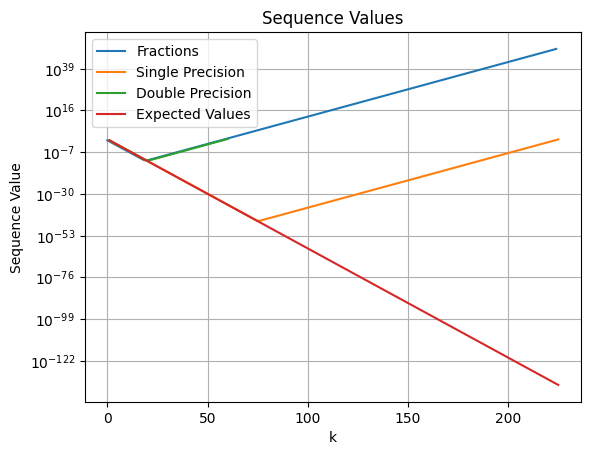

In [15]:
x_single = generate_n_elements(n_single, np.float32, [1/3, 1/12])
x_double = generate_n_elements(n_double, np.float64, [1/3, 1/12])
x_fractions = generate_n_elements(n_fraction, Frac, [Frac(1,3), Frac(1,12)])
x_expected = expected_values(n_single)

plt.semilogy(np.arange(0, n_fraction), x_fractions, label='Fractions')
plt.semilogy(np.arange(1, n_single+1), x_single, label='Single Precision')
plt.semilogy(np.arange(1, n_double+1), x_double, label='Double Precision')
plt.semilogy(np.arange(1, n_fraction+1), x_expected, label='Expected Values')
plt.title('Sequence Values')
plt.xlabel('k')
plt.ylabel('Sequence Value')
plt.legend()
plt.grid(True)
plt.show()

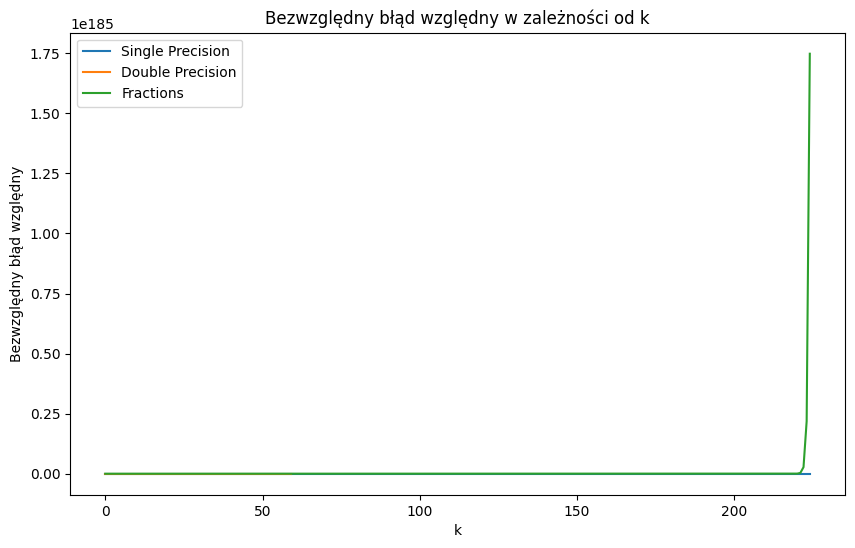

In [20]:
error_single = np.abs((x_single - x_expected) / x_expected)
error_double = np.abs((x_double - x_expected[:n_double]) / x_expected[:n_double])
error_fractions = [abs(float(x - x_expected[i]) / float(x_expected[i])) for i, x in enumerate(x_fractions)]

plt.figure(figsize=(10, 6))
plt.plot(range(n_single), error_single, label='Single Precision')
plt.plot(range(n_double), error_double, label='Double Precision')
plt.plot(range(n_fraction), error_fractions, label='Fractions')
plt.xlabel('k')
plt.ylabel('Bezwzględny błąd względny')
plt.title('Bezwzględny błąd względny w zależności od k')
plt.legend()
plt.show()
